In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset.csv


In [2]:
%config IPcompleter.use_jedi=False

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('heart_disease_dataset.csv',sep=";")
df=data.copy()

In [5]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [7]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

Two Layer Neural Network

In [9]:
class ArtificialNeuralNetwork:
  def __init__(self, x, y):
    self.IN=x
    #initialize weights with random values
    self.W1=np.random.rand(self.IN.shape[1],6)
    self.W2=np.random.rand(6,4) 
    self.W3=np.random.rand(4,1)
    self.y=y
    self.OUT     = np.zeros(self.y.shape)
    self.learning_rate=0.3

Activation Function - Sigmoid

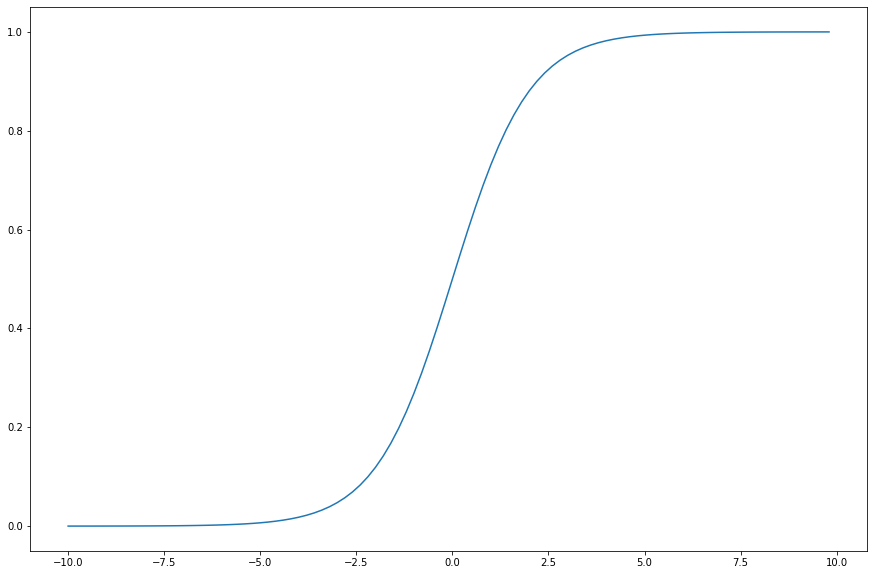

In [10]:
import math

def sigmoid(x):
  a=[]
  for item in x:
     a.append(1/(1+math.exp(-item)))
  return a

x=np.arange(-10.,10.,0.2)
sig=sigmoid(x)
plt.figure(figsize=(15,10))
plt.plot(x,sig)
plt.show()

In [11]:
def sigmoid_derivative(x):
  return x * (1.0 - x)

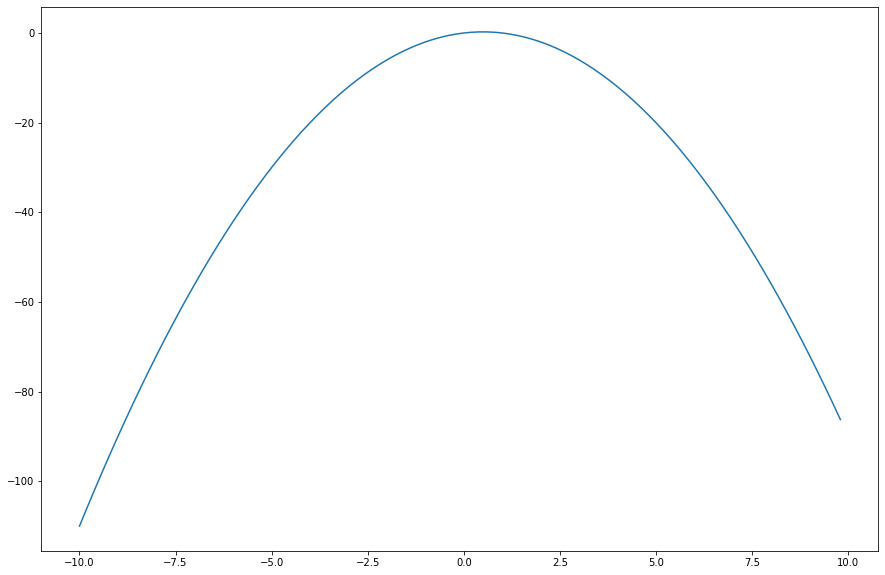

In [12]:
x=np.arange(-10.,10.,0.2)
sig=sigmoid_derivative(x)
plt.figure(figsize=(15,10))
plt.plot(x,sig)
plt.show()

Loss Function

In [13]:
def mse_loss(y_true,y_pred):
  return ((y_true-y_pred)**2).mean()
  # y_true and y_pred are numpy arrays of the same length.
def mse_loss_derivative(y_true,y_pred):
  return (2*(y_true-y_pred))
  # y_true and y_pred are numpy arrays of the same length.

In [14]:
def feed_forward(self):
  self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
  self.HIDDEN_LAYER_2 = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))
  self.output=sigmoid(np.dot(self.HIDDEN_LAYER_2,self.W3))

## Back Propagation - Step 1 - Calculate the loss

In [15]:
def d_W1(self):
  d_W1=np.dot(self.IN.T, (np.dot(mse_loss_derivative(self.y,self.HIDDEN_LAYER_2)*sigmoid_derivative(self.HIDDEN_LAYER_2),self.W2.T)*sigmoid_derivative(self.HIDDEN_LAYER_1)))

In [16]:
def d_W2(self):
  d_W2=np.dot(self.HIDDEN_LAYER_1.T,(np.dot(mse_loss_derivative(self.y,self.output)*sigmoid_derivative(self.output),self.self.W3.T)*sigmoid_derivative(self.HIDDEN_LAYER_2)))

In [17]:
def d_W3(self):
  d_W3=np.dot(self.HIDDEN_LAYER_2.T, (mse_loss_derivative(self.y, self.output)*sigmoid_derivative(self.output)))

In [18]:
def back_propagate(self):
  # application of the chain rule to find derivative of the loss function with respect to W2 and W1
  print(self.HIDDEN_LAYER_2.T)
  d_W3=np.dot(self.HIDDEN_LAYER_2.T, (mse_loss_derivative(self.y, self.output)*sigmoid_derivative(self.output)))
  print(d_W3)
  d_W2=np.dot(self.HIDDEN_LAYER_1.T,(np.dot(mse_loss_derivative(self.y,self.output)*sigmoid_derivative(self.output),self.self.W3.T)*sigmoid_derivative(self.HIDDEN_LAYER_2)))
  print(d_W2)
  d_W1=np.dot(self.IN.T, (np.dot(mse_loss_derivative(self.y,self.HIDDEN_LAYER_2)*sigmoid_derivative(self.HIDDEN_LAYER_2),self.W2.T)*sigmoid_derivative(self.HIDDEN_LAYER_1)))

  # update the weights with the derivative (slope) of the loss function
  self.W1+=self.learning_rate*d_W1
  self.W2+=self.learning_rate*d_W2
  self.W3+=self.learning_rate*d_W3



Putting it altogether

In [19]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))


class ArtificialNeuralNetwork:

  def __init__(self, x, y):
    self.IN=x
    #initialize weights with random values
    self.W1=np.random.rand(self.IN.shape[1],6)
    self.W2=np.random.rand(6,4) 
    self.W3=np.random.rand(4,1)
    self.y=y
    self.OUT     = np.zeros(self.y.shape)
    self.learning_rate=0.3
  
  def feed_forward(self):
    self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
    self.HIDDEN_LAYER_2 = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))
    self.output=sigmoid(np.dot(self.HIDDEN_LAYER_2,self.W3))

  def back_propagate(self):
    # application of the chain rule to find derivative of the loss function with respect to W2 and W1
    print(self.HIDDEN_LAYER_2.T)
    d_W3=np.dot(self.HIDDEN_LAYER_2.T, (mse_loss_derivative(self.y, self.output)*sigmoid_derivative(self.output)))
    print(d_W3)
    d_W2=np.dot(self.HIDDEN_LAYER_1.T,(np.dot(mse_loss_derivative(self.y,self.output)*sigmoid_derivative(self.output),self.W3.T)*sigmoid_derivative(self.HIDDEN_LAYER_2)))
    print(d_W2)
    d_W1=np.dot(self.IN.T, (np.dot(mse_loss_derivative(self.y,self.HIDDEN_LAYER_2)*sigmoid_derivative(self.HIDDEN_LAYER_2),self.W2.T)*sigmoid_derivative(self.HIDDEN_LAYER_1)))

    # update the weights with the derivative (slope) of the loss function
    self.W1+=self.learning_rate*d_W1
    self.W2+=self.learning_rate*d_W2
    self.W3+=self.learning_rate*d_W3

  def train(self, epochs, learning_rate):
    self.learning_rate=learning_rate
    for i in range(epochs):
            self.feed_forward()
            self.back_propagate()
    print("Successfully Trained the Model")
    print("Weights 1:", self.W1)
    print("Weights 2:", self.W2)

  def print_output(self):
    print(self.output)




In [31]:
X=df.drop('target',axis=1)
y=np.array(df['target']).reshape(-1,1)

In [35]:
X=StandardScaler().fit_transform(X)

In [36]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [37]:
epochs=5
learning_rate=0.9
ann = ArtificialNeuralNetwork(X,y)
ann.train(epochs,learning_rate)

[[0.83185782 0.79985763 0.56629636 ... 0.97972316 0.86940891 0.61764954]
 [0.77172421 0.74600508 0.5626271  ... 0.97214647 0.85427223 0.59600629]
 [0.87949152 0.82145517 0.5728571  ... 0.98459389 0.90245609 0.63274216]
 [0.84017055 0.80199966 0.55851453 ... 0.96260575 0.82528927 0.58711728]]
[[-18.12768135]
 [-18.21261104]
 [-18.27000912]
 [-17.1686679 ]]
[[-2.13689405e-01 -1.06185378e-01 -3.89956610e-01 -1.53049147e-01]
 [-1.61288495e-01 -8.00394768e-02 -2.91647362e-01 -1.20835081e-01]
 [-2.00448331e-01 -9.86736011e-02 -3.71484794e-01 -1.44997979e-01]
 [-2.65998415e-01 -1.31544258e-01 -4.76393384e-01 -1.77511458e-01]
 [-1.47921829e-01 -7.55873526e-02 -2.46507322e-01 -1.07961839e-01]
 [ 2.46637285e-04 -2.27180144e-03  2.46318428e-02 -3.13737939e-02]]
[[0.77394318 0.95924625 0.9600197  ... 0.50000001 0.5        0.96001209]
 [0.76734784 0.96252956 0.9633827  ... 0.5        0.5        0.96337753]
 [0.78104788 0.93968471 0.94039862 ... 0.50000003 0.5        0.94038148]
 [0.77662598 0.93472

In [38]:
ann.print_output()

[[1.18303450e-25]
 [2.84742951e-26]
 [5.71193939e-27]
 [5.71195100e-27]
 [5.71963248e-27]
 [5.84451634e-25]
 [5.93087803e-27]
 [5.71195411e-27]
 [5.71208706e-27]
 [5.71196789e-27]
 [6.45238537e-27]
 [5.71193547e-27]
 [5.71195230e-27]
 [8.68649574e-19]
 [5.71193544e-27]
 [5.71193801e-27]
 [5.71193543e-27]
 [2.13174900e-23]
 [5.75324680e-27]
 [5.71197996e-27]
 [2.44397093e-15]
 [5.71194071e-27]
 [5.71198589e-27]
 [1.63746758e-19]
 [5.71200907e-27]
 [5.71951802e-27]
 [5.71216207e-27]
 [5.72055696e-27]
 [5.71203167e-27]
 [7.80910167e-24]
 [5.71193545e-27]
 [1.01278470e-18]
 [5.71194190e-27]
 [9.08414981e-16]
 [1.94869436e-20]
 [2.22649137e-25]
 [5.71193543e-27]
 [5.93680801e-27]
 [5.71193651e-27]
 [5.71215169e-27]
 [5.71744969e-27]
 [5.72493631e-27]
 [1.54538238e-14]
 [1.36413565e-26]
 [5.71193593e-27]
 [5.71194239e-27]
 [5.71193611e-27]
 [5.71201494e-27]
 [5.71193581e-27]
 [5.71260453e-27]
 [5.71193754e-27]
 [1.29105836e-14]
 [1.54294438e-14]
 [5.71193543e-27]
 [5.71193550e-27]
 [5.736766